In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [13]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | coahuayana
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | husavik
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | macau
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | taoudenni
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | yulara
Processing Record 14 of Set 1 | pilar
Processing Record 15 of Set 1 | cidreira
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | maunabo
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | yerbogachen
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | touros
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 23 of Set 1 |

Processing Record 37 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 38 of Set 4 | tuatapere
Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | samusu
City not found. Skipping...
Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | bani
Processing Record 43 of Set 4 | ketchikan
Processing Record 44 of Set 4 | vilyuysk
Processing Record 45 of Set 4 | college
Processing Record 46 of Set 4 | pribelskiy
City not found. Skipping...
Processing Record 47 of Set 4 | gamba
Processing Record 48 of Set 4 | davenda
Processing Record 49 of Set 4 | hervey bay
Processing Record 50 of Set 4 | atherton
Processing Record 1 of Set 5 | aloleng
Processing Record 2 of Set 5 | olafsvik
Processing Record 3 of Set 5 | lata
Processing Record 4 of Set 5 | saint-philippe
Processing Record 5 of Set 5 | galesong
Processing Record 6 of Set 5 | the valley
Processing Record 7 of Set 5 | talnakh
Processing Record 8 of Set 5 | moissala
Processing Record 9 

Processing Record 25 of Set 8 | lampazos de naranjo
Processing Record 26 of Set 8 | sandy bay
Processing Record 27 of Set 8 | paita
Processing Record 28 of Set 8 | sao felix do xingu
Processing Record 29 of Set 8 | kincardine
Processing Record 30 of Set 8 | inyonga
Processing Record 31 of Set 8 | rayachoti
Processing Record 32 of Set 8 | avera
Processing Record 33 of Set 8 | dawlatabad
Processing Record 34 of Set 8 | plettenberg bay
Processing Record 35 of Set 8 | lorengau
Processing Record 36 of Set 8 | chengmai
City not found. Skipping...
Processing Record 37 of Set 8 | oranjemund
Processing Record 38 of Set 8 | lerwick
Processing Record 39 of Set 8 | kristiansund
Processing Record 40 of Set 8 | bandar penggaram
City not found. Skipping...
Processing Record 41 of Set 8 | asau
Processing Record 42 of Set 8 | pafos
Processing Record 43 of Set 8 | san jorge
Processing Record 44 of Set 8 | mineros
Processing Record 45 of Set 8 | marsaxlokk
Processing Record 46 of Set 8 | lompoc
Processin

Processing Record 12 of Set 12 | salalah
Processing Record 13 of Set 12 | opuwo
Processing Record 14 of Set 12 | paragominas
Processing Record 15 of Set 12 | niquelandia
Processing Record 16 of Set 12 | bonavista
Processing Record 17 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 18 of Set 12 | pundaguitan
Processing Record 19 of Set 12 | nova londrina
Processing Record 20 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 21 of Set 12 | codrington
Processing Record 22 of Set 12 | kitimat
Processing Record 23 of Set 12 | yarmouth
Processing Record 24 of Set 12 | karratha
Processing Record 25 of Set 12 | menongue
Processing Record 26 of Set 12 | tezu
Processing Record 27 of Set 12 | salem
Processing Record 28 of Set 12 | udachnyy
Processing Record 29 of Set 12 | tambacounda
Processing Record 30 of Set 12 | san cristobal
Processing Record 31 of Set 12 | fairbanks
Processing Record 32 of Set 12 | peniche
Processing Record 33 of Set 12 | sobolevo
Proce

In [16]:
len(city_data)

566

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,9.59,86,21,5.08,GL,2021-12-01 00:29:26
1,Coahuayana,18.7333,-103.6833,83.68,78,78,3.44,MX,2021-12-01 00:29:27
2,Ushuaia,-54.8000,-68.3000,58.66,36,75,21.85,AR,2021-12-01 00:26:07
3,Rikitea,-23.1203,-134.9692,76.50,75,0,20.18,PF,2021-12-01 00:29:27
4,Husavik,66.0449,-17.3389,24.71,79,97,7.54,IS,2021-12-01 00:29:27
5,Khatanga,71.9667,102.5000,-41.42,100,84,1.95,RU,2021-12-01 00:29:28
6,Airai,-8.9266,125.4092,72.90,56,94,0.38,TL,2021-12-01 00:29:28
7,Macau,22.2006,113.5461,61.07,48,0,28.77,MO,2021-12-01 00:26:03
8,Castro,-24.7911,-50.0119,63.46,54,0,2.73,BR,2021-12-01 00:29:28
9,Taoudenni,22.6783,-3.9836,65.25,10,98,13.33,ML,2021-12-01 00:29:29


In [18]:
new_column_order = [
    'City',
    'Country',
    'Date',
    'Lat',
    'Lng',
    'Max Temp',
    'Humidity',
    'Cloudiness',
    'Wind Speed'
]

In [19]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2021-12-01 00:29:26,65.6145,-37.6368,9.59,86,21,5.08
1,Coahuayana,MX,2021-12-01 00:29:27,18.7333,-103.6833,83.68,78,78,3.44
2,Ushuaia,AR,2021-12-01 00:26:07,-54.8000,-68.3000,58.66,36,75,21.85
3,Rikitea,PF,2021-12-01 00:29:27,-23.1203,-134.9692,76.50,75,0,20.18
4,Husavik,IS,2021-12-01 00:29:27,66.0449,-17.3389,24.71,79,97,7.54


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [5]:
city_data_df = pd.read_csv("weather_data/cities.csv")

In [6]:
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Tasiilaq,GL,2021-12-01 00:29:26,65.6145,-37.6368,9.59,86,21,5.08
1,1,Coahuayana,MX,2021-12-01 00:29:27,18.7333,-103.6833,83.68,78,78,3.44
2,2,Ushuaia,AR,2021-12-01 00:26:07,-54.8000,-68.3000,58.66,36,75,21.85
3,3,Rikitea,PF,2021-12-01 00:29:27,-23.1203,-134.9692,76.50,75,0,20.18
4,4,Husavik,IS,2021-12-01 00:29:27,66.0449,-17.3389,24.71,79,97,7.54
...,...,...,...,...,...,...,...,...,...,...
561,561,Sal Rei,CV,2021-12-01 00:44:05,16.1833,-22.9167,72.16,64,100,20.47
562,562,Tessalit,ML,2021-12-01 00:44:05,20.1986,1.0114,73.04,17,100,8.77
563,563,Capaci,IT,2021-12-01 00:44:05,38.1711,13.2393,51.40,70,40,4.00
564,564,Sibu,MY,2021-12-01 00:44:05,2.3000,111.8167,79.11,88,20,5.01


In [7]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

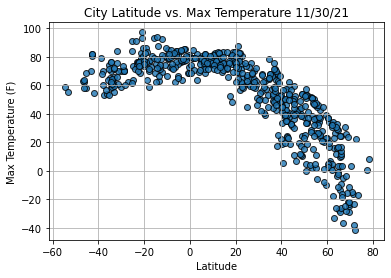

In [8]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

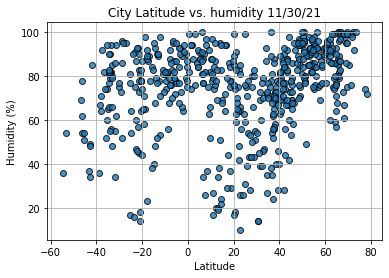

In [10]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

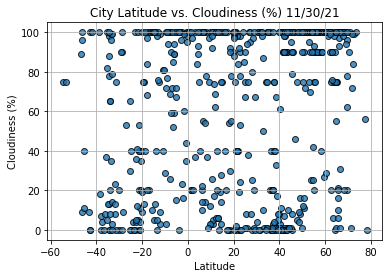

In [11]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

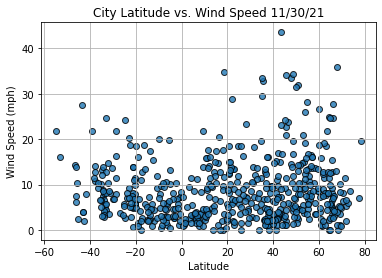

In [12]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
index13 = city_data_df.loc[13]

In [17]:
index13

City_ID                        13
City                        Pilar
Country                        BR
Date          2021-12-01 00:29:30
Lat                       -9.5972
Lng                      -35.9567
Max Temp                    78.73
Humidity                       81
Cloudiness                     72
Wind Speed                   7.87
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
561     True
562     True
563     True
564     True
565     True
Name: Lat, Length: 566, dtype: bool

In [22]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

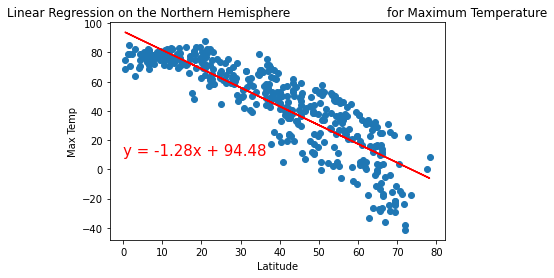

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,10))

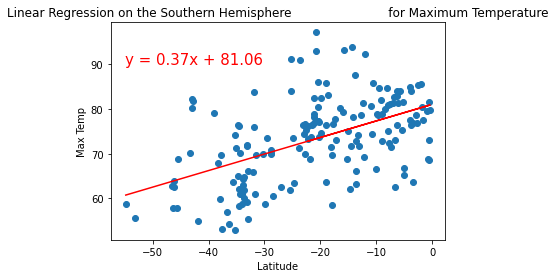

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,90))

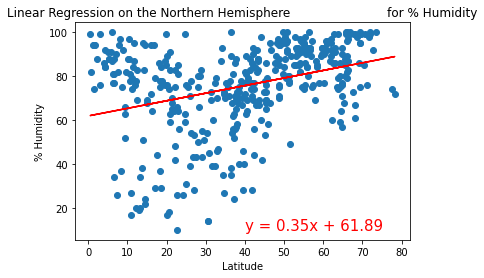

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

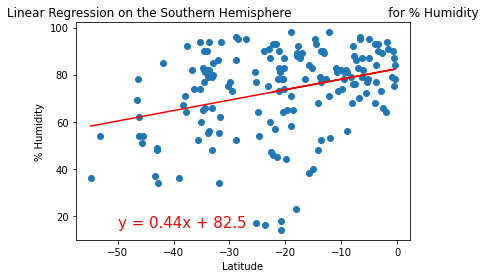

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

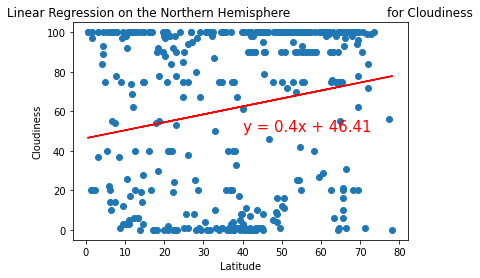

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,50))

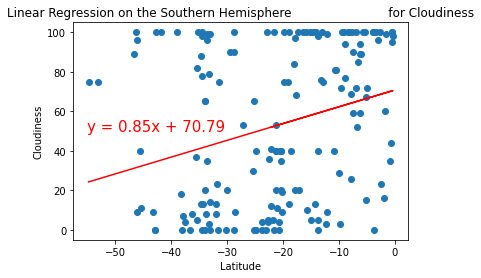

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-55,50))

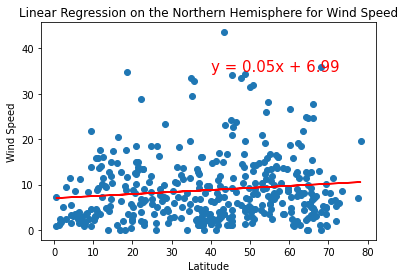

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

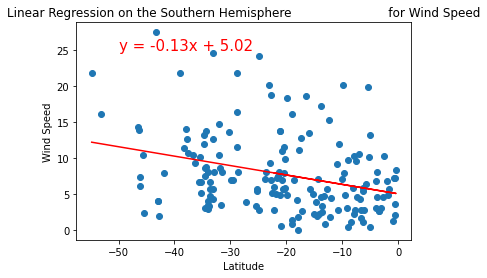

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))